# My First Deep Learning



## 1. Importing the packages
필요한 패키지들 로드하기

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import load_model

## 2. Data 액세스하기

함께 다운받은 Training data를 액세스합니다.

In [2]:
train_dir='../data/training_set/'
test_dir='../data/test_set/'

train_cat_dir=train_dir+'cats' # Training Set of Cats
train_dog_dir=train_dir+'dogs' # Training Set of Dogs

train_cat_fnames=os.listdir(train_cat_dir) # 파일명 받기
train_dog_fnames=os.listdir(train_dog_dir)

# test_cat_fnames=os.listdir(test_dir+'cats')
# test_dog_fnames=os.listdir(test_dir+'dogs')

In [7]:
{len(train_cat_fnames),len(train_dog_fnames)} # Training set 갯수 

{4001, 4006}

# 3.Data 확인 해보기 
Images 랜덤으로 10장만 보기 ( 고양이 5장, 강아지 5장 )

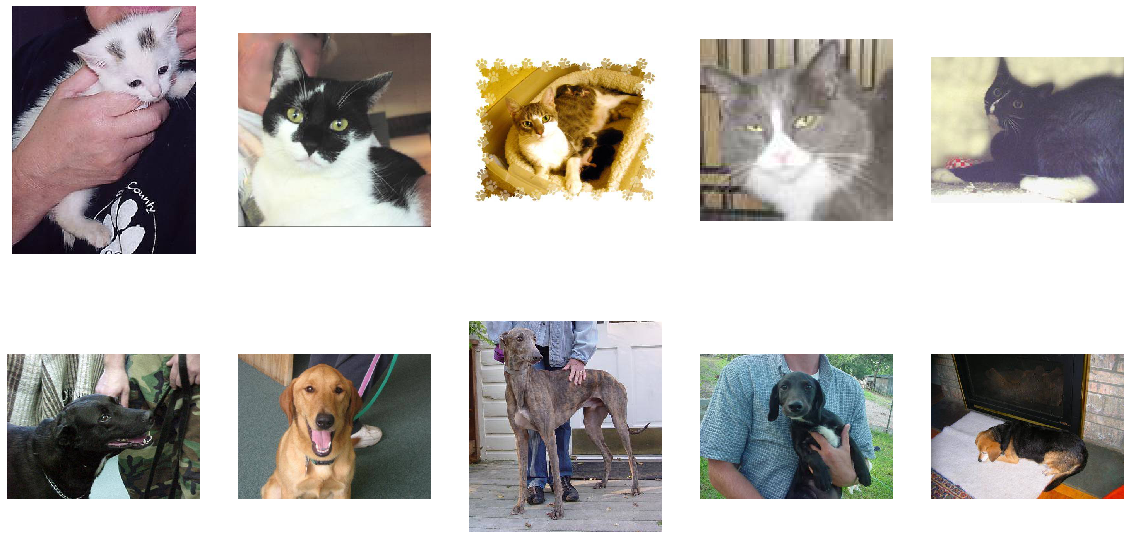

In [5]:
nrows=2
ncols=5

cats=np.random.choice(train_cat_fnames, ncols, replace=False)
cats=[os.path.join(train_cat_dir,fname) for fname in cats]
dogs=np.random.choice(train_dog_fnames, ncols, replace=False)
dogs=[os.path.join(train_dog_dir,fname) for fname in dogs]

all_pics=np.concatenate((cats,dogs),axis=0)

fig=plt.figure()
fig.set_size_inches(20,10)

for i,img_path in enumerate(all_pics):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    
    img=mpimage.imread(img_path)
    plt.imshow(img)

# # 4. Keras 이용하기

In [6]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


We use ImageDataGenerator to do data argumentation,please note we only apply augmentation to training data, and only rescalling with testing(validation) data



In [8]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,#rescaling factor
                                rotation_range=45, #Int. Degree range for random rotations.
                                width_shift_range=0.2, #fraction of total width
                                height_shift_range=0.2,#fraction of total height
                                shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                                zoom_range=0.2,#Float or [lower, upper]. Range for random zoom
                                horizontal_flip=True,#Boolean. Randomly flip inputs horizontally.
                                fill_mode='nearest' #Points outside the boundaries of the input are filled according to the given mode
                                )

test_datagen=ImageDataGenerator(rescale=1.0/255.0)

#ImageDataGenarator will generate dataset, as well as generate training labels based on the path,for example,
#our training directory is ../data/training_set/, there are two directory under it, cats and dogs,
#then the generator will generate data with label 'cats' and 'dogs', and with all pictures under each directory respectively
train_generator=train_datagen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size=20,
                                                class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


We will use three CNN with three Maxpooling layers first, then get it flattened,then one fully connected layer with 512 neurons.
for input layer and all hidden layers, we will use relu as activation function. In the output layer, we will use sigmoid to activate it.

In [9]:
model=tf.keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history=model.fit_generator(train_generator,
                  epochs=150,
                  steps_per_epoch=100,
                  validation_data=test_generator,
                  validation_steps=50,
                  verbose=1
                 )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/150
100/100 [==============================] - 33s 328ms/step - loss: 0.7002 - accuracy: 0.5150 - val_loss: 0.6839 - val_accuracy: 0.5520
Epoch 2/150
100/100 [==============================] - 33s 327ms/step - loss: 0.6902 - accuracy: 0.5280 - val_loss: 0.6885 - val_accuracy: 0.5600
Epoch 3/150
100/100 [==============================] - 36s 361ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6916 - val_accuracy: 0.5890
Epoch 4/150
100/100 [==============================] - 36s 360ms/step - loss: 0.6885 - accuracy: 0.5642 - val_loss: 0.6804 - val_accuracy: 0.5880
Epoch 5/150
100/100 [==============================] - 36s 360ms/step - loss: 0.6903 - accuracy: 0.5285 - val_loss: 0.6703 - val_accuracy: 0.5880
Epoch 6/150
100/100 [==============================] - 35s 350ms/step - loss: 0.6812 - accuracy: 0.54

Epoch 109/150
100/100 [==============================] - 39s 388ms/step - loss: 0.3668 - accuracy: 0.8262 - val_loss: 0.3291 - val_accuracy: 0.8580
Epoch 110/150
100/100 [==============================] - 37s 370ms/step - loss: 0.3428 - accuracy: 0.8470 - val_loss: 0.3092 - val_accuracy: 0.8740
Epoch 111/150
100/100 [==============================] - 39s 392ms/step - loss: 0.3503 - accuracy: 0.8540 - val_loss: 0.3194 - val_accuracy: 0.8590
Epoch 112/150
100/100 [==============================] - 39s 392ms/step - loss: 0.3676 - accuracy: 0.8383 - val_loss: 0.3162 - val_accuracy: 0.8670
Epoch 113/150
100/100 [==============================] - 36s 363ms/step - loss: 0.3458 - accuracy: 0.8448 - val_loss: 0.3134 - val_accuracy: 0.8750
Epoch 114/150
100/100 [==============================] - 36s 358ms/step - loss: 0.3505 - accuracy: 0.8355 - val_loss: 0.2990 - val_accuracy: 0.8720
Epoch 115/150
100/100 [==============================] - 36s 358ms/step - loss: 0.3648 - accuracy: 0.8365 - val_

Based the result above, the training is quite good because accurary of validation set is higher than that of training set. I only trained for 150 epochs and you can try to set it o 200 or more, to see how accurate you can get at the end.

I plot the result as below, as you can see, the accuracy of both training and validation are still growing,which means we defenity can improve that by adding more epochs, and at the sametime, there's no sigh of overfitting, which is great.

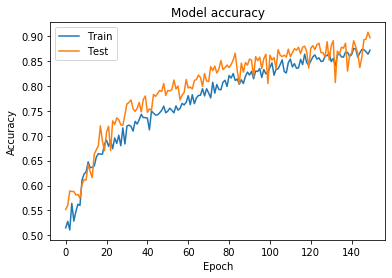

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [17]:
#Save model to a file
model_name='cat-dogs-model.h5'
model.save(model_name) 